Data Cleaning/Normalization
1. Convert Emojis to Words
2. Convert to Lowercase
3. Expand Contractions
4. Remove Foreign Language
5. Remove Null Values
6. Remove Special Characters

Tokenization

Stopword Removal

Lemmatization or Stemming



!pip install emoji

In [4]:
import pandas as pd

df = pd.read_excel('C:\\Users\\Geetha\\OneDrive\\MSc Project\\Code\\10-Jan\\Data Preprocessing\\Amazon_Apple_iPhones.xlsx')
df.head()

,Website,Product Name,Product Number,Price in Dollars,User,Title,Date,Rating,Review
0,Amazon,Apple iPhone XR,B07P6Y7954,236.9,Terri,1st Time Apple iPhone User,"August 10, 2020",4,The phone I received was by all estimations br...
1,Amazon,Apple iPhone XR,B07P6Y7954,236.9,lala,amazing quality,"June 10, 2023",5,"at first, i was a bit sketched out to order a ..."
2,Amazon,Apple iPhone XR,B07P6Y7954,236.9,Karly J.,Overall good buy,"May 21, 2023",4,"My phone works great, no problems, came with a..."
3,Amazon,Apple iPhone XR,B07P6Y7954,236.9,Jerry,The price and reliability,"June 15, 2023",5,This Iphone is used for personal use. It came ...
4,Amazon,Apple iPhone XR,B07P6Y7954,236.9,Lisa Luster,No issues,"May 26, 2023",5,Ordered this phone for myself after my daughte...


In [6]:
df.size

197694

In [8]:
df.shape

(21966, 9)

# Convert Emojis to Words

In [1]:
import pandas as pd
import emoji

def tokenize_emojis(text):
    if isinstance(text, str):  # Check if the value is a string (not NaN or float)
        # Replace emojis with their textual representation
        text_with_tokens = emoji.demojize(text)
        return text_with_tokens
    else:
        return str(text)  # Convert to string if the value is not a string (e.g., NaN or non-string)

# Read the Excel file into a DataFrame
file_path = 'C:\\Users\\Geetha\\OneDrive\\MSc Project\\Code\\19-Dec\\Amazon_Apple_iPhones.xlsx'
sheet_name = 'Sheet1'
column_names = ['Title', 'Review']

df = pd.read_excel(file_path, sheet_name=sheet_name)

# Apply the function to the specified columns
for column_name in column_names:
    df[column_name] = df[column_name].apply(tokenize_emojis)

# Save the DataFrame back to a new Excel file
output_file_path = 'Amazon_Emojis.xlsx'
df.to_excel(output_file_path, index=False)

print("Emojis converted and saved to the new Excel file.")


Emojis converted and saved to the new Excel file.


# Convert to Lowercase

In [2]:
import pandas as pd

def convert_to_lowercase(input_file, output_file):
    # Read the Excel file into a pandas DataFrame
    df = pd.read_excel('C:\\Users\\Geetha\\OneDrive\\MSc Project\\Code\\19-Dec\\Amazon_Emojis.xlsx')
    
    # Convert the contents of "Title" and "Review" columns to lowercase
    df['Title'] = df['Title'].str.lower()
    df['Review'] = df['Review'].str.lower()
    
    # Save the updated DataFrame
    df.to_excel(output_file, index=False)

if __name__ == "__main__":
    input_file = "Amazon_Emojis.xlsx"
    output_file = "Amazon_Lowercase.xlsx"
    convert_to_lowercase(input_file, output_file)


# Expand Contractions

In [5]:
import pandas as pd
import re

# Define the dictionary to map contractions to their expanded forms
contraction_map = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
}

# Regular expression pattern to find contractions in the text
contraction_pattern = re.compile(r"\b(" + "|".join(contraction_map.keys()) + r")\b")

def expand_contractions(text):
    # Function to expand contractions using the dictionary
    def replace(match):
        return contraction_map[match.group(0)]
    
    # Use regular expression to find and replace contractions in the text
    return contraction_pattern.sub(replace, text)

def expand_contractions_in_columns(input_file, output_file, column1):
    # Read the Excel file into a pandas DataFrame
    df = pd.read_excel(input_file)
    
    # Expand contractions in the specified columns
    df[column1] = df[column1].apply(expand_contractions)
    
    # Save the updated DataFrame to a new Excel file
    df.to_excel(output_file, index=False)
    
if __name__ == "__main__":
    input_file = "Amazon_Lowercase.xlsx"
    output_file = "Amazon_Contractions.xlsx"
    
    # Specify the columns where you want to expand contractions
    column1 = "Review"
    
    # Call the function to expand contractions in the specified columns
    expand_contractions_in_columns(input_file, output_file, column1)

# Remove Foreign Language

In [7]:
import pandas as pd
from langdetect import detect

def remove_foreign_languages(text, target_language='en'):
    # Check if the input is a string and not too short, if not return it as is
    if isinstance(text, str) and len(text) > 10:  # Adjust the minimum length as needed
        # Detect the language of the text
        try:
            detected_language = detect(text)
            # If the detected language is the English language, return the text
            if detected_language == target_language:
                return text
        except:
            pass
        
    return ''

def clean_reviews(input_file, output_file):
    # Read the Excel file into a pandas DataFrame
    df = pd.read_excel(input_file)
    
    # Remove foreign languages from "Title" and "Review" columns
    df['Review'] = df['Review'].apply(remove_foreign_languages)
    
    # Save the updated DataFrame back to a new Excel file
    df.to_excel(output_file, index=False)

if __name__ == "__main__":
    input_file = "Amazon_Contractions.xlsx"
    output_file = "Amazon_Foreign_Language.xlsx"
    clean_reviews(input_file, output_file)


# Remove Null Values

In [8]:
import pandas as pd

input_file = "Amazon_Foreign_Language.xlsx"
output_file = "Amazon_Null.xlsx"
column_name = "Review"

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(input_file)

# Remove empty rows from the specific column
df = df.dropna(subset=[column_name])

# Save the updated dataFrame
df.to_excel(output_file, index=False)


# Remove Special Characters

In [15]:
import pandas as pd
import re

def remove_special_chars(text):
    # Check if the input is a string, if not return it as is
    if isinstance(text, str):
        # Remove special characters using regular expression
        cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
        return cleaned_text
    else:
        return text

def clean_reviews(input_file, output_file):
    # Read the Excel file into a pandas dataFrame
    df = pd.read_excel('C:\\Users\\Geetha\\OneDrive\\MSc Project\\Code\\19-Dec\\Amazon_Null.xlsx')
    
    # Clean "Title" and "Review" columns
    df['Title'] = df['Title'].apply(remove_special_chars)
    df['Review'] = df['Review'].apply(remove_special_chars)
    
    # Save the updated dataFrame
    df.to_excel(output_file, index=False)

if __name__ == "__main__":
    input_file = "Amazon_Null.xlsx"
    output_file = "Amazon_Special_Character.xlsx"
    clean_reviews(input_file, output_file)


# Remove Stopwords

In [19]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')
nltk.download('stopwords')

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_text = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

if __name__ == "__main__":
    input_file = "Amazon_Special_Character.xlsx"
    output_file = "Amazon_Stopwords.xlsx"
    column_name = "Review"

    # Read the Excel file into a pandas DataFrame
    df = pd.read_excel(input_file)

    # Remove stopwords from the specific column
    df[column_name] = df[column_name].apply(remove_stopwords)

    # Save the updated DataFrame to a new Excel file
    df.to_excel(output_file, index=False)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Geetha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Geetha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


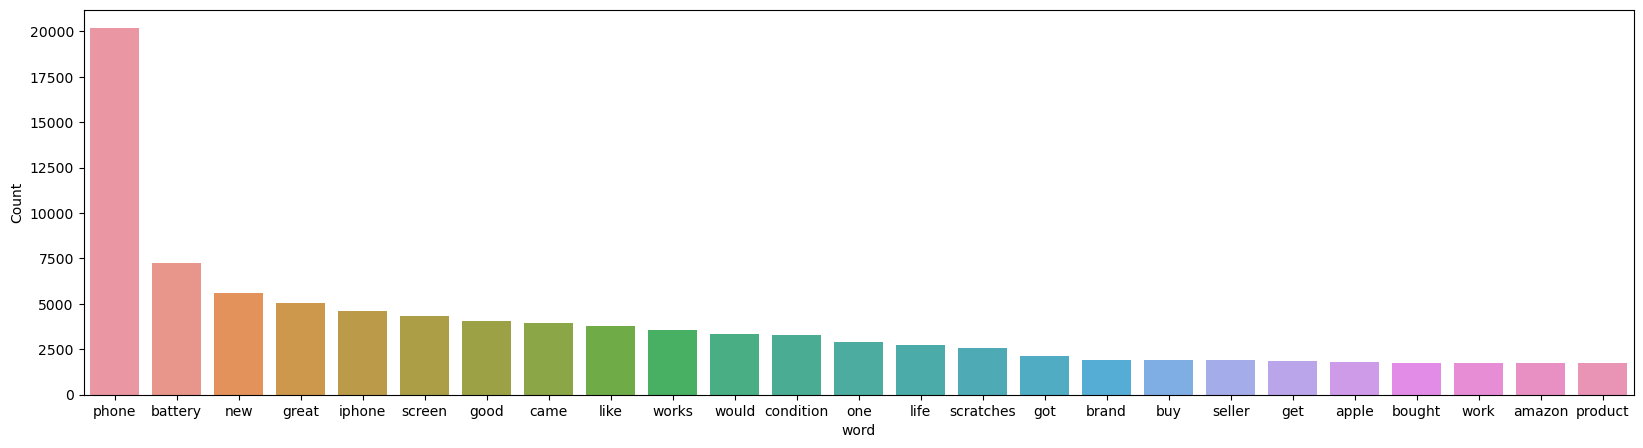

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import FreqDist

# Define the freq_words function before calling it
def freq_words(x, terms=25):
    # Convert elements to strings, handling float values
    all_words = ' '.join([str(Review) if isinstance(Review, (str, float)) else '' for Review in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word': list(fdist.keys()), 'count': list(fdist.values())})

    # selecting the top 'terms' most frequent words
    d = words_df.nlargest(columns="count", n=terms)
    plt.figure(figsize=(20, 5))
    ax = sns.barplot(data=d, x="word", y="count")
    ax.set(ylabel='Count')
    plt.show()

# Load the DataFrame from the Excel file
df = pd.read_excel('C:\\Users\\Geetha\\OneDrive\\MSc Project\\Code\\19-Dec\\Data Preprocessing\\Amazon_Stopwords.xlsx')

# Call the freq_words function with the 'Review' column
freq_words(df['Review'])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Geetha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


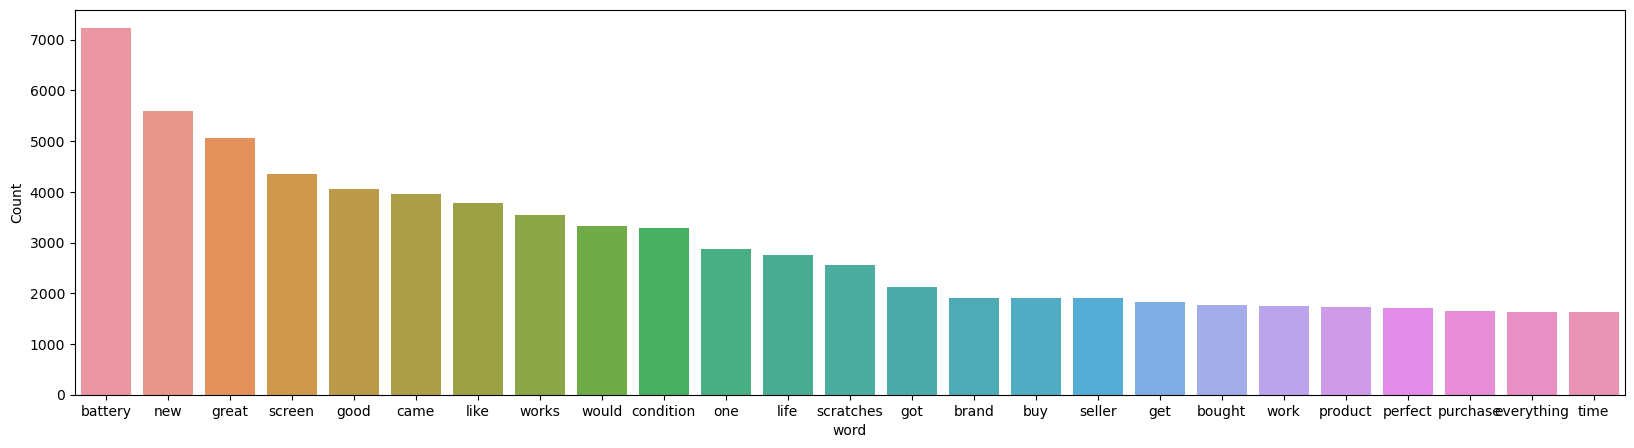

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import FreqDist
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

# Define the freq_words function before calling it
def freq_words(x, terms=25):
    # Convert elements to strings, handling float values
    all_words = ' '.join([str(Review) if isinstance(Review, (str, float)) else '' for Review in x])
    all_words = all_words.split()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    all_words = [word for word in all_words if word.lower() not in stop_words]

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word': list(fdist.keys()), 'count': list(fdist.values())})

    # Remove specified terms ('phone', 'iphone') from the dataframe
    words_df = words_df[~words_df['word'].isin(['phone', 'iphone', 'apple', 'amazon'])]

    # selecting the top 'terms' most frequent words
    d = words_df.nlargest(columns="count", n=terms)

    # Plot the bar chart
    plt.figure(figsize=(20, 5))
    ax = sns.barplot(data=d, x="word", y="count")
    ax.set(ylabel='Count')
    
    # Save the plot as an image (optional)
    plt.savefig('word_frequency_plot.png')
    
    # Save the dataframe to a new Excel file
    d.to_excel('New_Stopwords.xlsx', index=False)
    
    # Show the plot
    plt.show()

# Load the DataFrame from the Excel file
df = pd.read_excel('C:\\Users\\Geetha\\OneDrive\\MSc Project\\Code\\19-Dec\\Data Preprocessing\\Amazon_Stopwords.xlsx')

# Call the freq_words function with the 'Review' column
freq_words(df['Review'])


In [31]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

def remove_stopwords(text):
    if pd.isnull(text):  # Check for NaN values
        return ''
    
    stop_words = set(stopwords.words('english'))
    custom_stopwords = ['phone', 'iphone', 'apple', 'amazon']  # Additional stopwords
    stop_words.update(custom_stopwords)

    tokens = word_tokenize(text)
    filtered_text = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

if __name__ == "__main__":
    input_file = "Amazon_Stopwords.xlsx"
    output_file = "New_Stopwords.xlsx"
    column_name = "Review"

    # Read the Excel file into a pandas DataFrame
    df = pd.read_excel(input_file)

    # Remove stopwords from the specific column
    df[column_name] = df[column_name].apply(remove_stopwords)

    # Save the updated DataFrame to a new Excel file
    df.to_excel(output_file, index=False)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Geetha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Geetha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Lemmatization

Reduce words to their base or root form. e.g., running -> run

In [32]:
import nltk
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

input_file = "New_Stopwords.xlsx"
output_file = "Amazon_Lemmatization.xlsx"
column_to_lemmatize = "Review"

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(input_file)

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if not recognized

lemmatizer = WordNetLemmatizer()

def lemmatize_sentence(sentence):
    if isinstance(sentence, str):  # Check if the sentence is a string
        words = nltk.word_tokenize(sentence)
        tagged_words = nltk.pos_tag(words)
        lemmatized_words = [lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in tagged_words]
        return ' '.join(lemmatized_words)
    else:
        return str(sentence)  # Return the non-string value as a string

df[column_to_lemmatize] = df[column_to_lemmatize].apply(lemmatize_sentence)

df.to_excel(output_file, index=False)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Geetha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Geetha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Geetha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Tokenization

nltk.download('punkt')

In [33]:
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize

def tokenize_text(text):
    # Check if the input is a string and not NaN
    if isinstance(text, str):
        # Use word_tokenize from nltk to tokenize the text into individual words
        return word_tokenize(text)
    else:
        # Return an empty list for non-string or NaN values
        return []

if __name__ == "__main__":
    input_file = "Amazon_Lemmatization.xlsx"
    output_file = "Amazon_Tokenization.xlsx"
    
    # Read the Excel file into a pandas DataFrame
    df = pd.read_excel(input_file)
    
    # Tokenize the "Review" column
    df['Review'] = df['Review'].apply(tokenize_text)
    
    # Save the updated DataFrame with tokenized reviews to another Excel file
    df.to_excel(output_file, index=False)


# POS Tagging